In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('results/dataframe_FakeNewsNet_None_results.csv')

In [26]:
df = df.fillna(0)
df.groupby(['model', 'L']).mean()

acc        f1         P
model    L                                
CCRNE    0.0  1.000000  1.000000  0.121739
GCN_GAE  0.0  0.923986  0.959834  0.121739
LP_PUL   0.0  0.898478  0.946401  0.121739
MCLS     0.0  0.735435  0.846849  0.121739
PU_LP    0.0  1.000000  1.000000  0.121739
RANDOM   0.0  0.758551  0.862342  0.121739
RCSVM    0.0  1.000000  1.000000  0.121739
RGCN_GAE 2.0  0.962391  0.980723  0.121739
         3.0  0.943333  0.970669  0.121739
         4.0  0.931884  0.964570  0.121739
         5.0  0.920362  0.958219  0.121739
RLP_PUL  0.0  0.990797  0.995357  0.121739

In [27]:
new_df = pd.DataFrame()

In [28]:
new_df['rate'] = [x for x in np.unique(df.P)]

In [29]:
for model in np.unique(df.model):
    if model == 'RGCN_MLP' or model == 'RGCN_GAE':
        new_df[model] = [df[(df['model'] == model) & (df['P'] == p)& (df['L'] == 2)].acc.mean() for p in np.unique(df.P)]
    new_df[model] = [df[(df['model'] == model) & (df['P'] == p)].acc.mean() for p in np.unique(df.P)]

In [30]:
new_df[['GCN_GAE', 'LP_PUL', 'MCLS', 'RANDOM', 'RGCN_GAE', 'RLP_PUL']]

,GCN_GAE,LP_PUL,MCLS,RANDOM,RGCN_GAE,RLP_PUL
0,0.931667,0.931667,0.761667,0.743333,0.962917,0.965000
1,0.925000,0.868333,0.788333,0.771667,0.960000,0.983333
2,0.906667,0.890000,0.763333,0.741667,0.965000,0.986667
3,0.950000,0.905000,0.733333,0.780000,0.955000,0.983333
4,0.890000,0.905000,0.748333,0.745000,0.968333,0.990000
5,0.853333,0.893333,0.795000,0.783333,0.963750,0.986667
6,0.883333,0.890000,0.715000,0.748333,0.945000,0.988333
7,0.898333,0.885000,0.715000,0.750000,0.940417,0.995000
8,0.936667,0.891667,0.700000,0.755000,0.942500,0.993333
9,0.883333,0.888333,0.731667,0.761667,0.942500,0.996667


In [37]:
# Função para destacar os maiores valores de cada linha
def destaque_maiores_linhas(s):
    return ['background-color: green' if v == s.max() else '' for v in s]

# Aplicar a função ao DataFrame
df_destacado = new_df[['GCN_GAE', 'LP_PUL', 'MCLS', 'RANDOM', 'RGCN_GAE']].style.apply(destaque_maiores_linhas, axis=1)
# df_destacado = new_df.style.apply(destaque_maiores_linhas, axis=1)
# Exibir o DataFrame destacado
df_destacado

,GCN_GAE,LP_PUL,MCLS,RANDOM,RGCN_GAE
0,0.931667,0.931667,0.761667,0.743333,0.962917
1,0.925000,0.868333,0.788333,0.771667,0.960000
2,0.906667,0.890000,0.763333,0.741667,0.965000
3,0.950000,0.905000,0.733333,0.780000,0.955000
4,0.890000,0.905000,0.748333,0.745000,0.968333
5,0.853333,0.893333,0.795000,0.783333,0.963750
6,0.883333,0.890000,0.715000,0.748333,0.945000
7,0.898333,0.885000,0.715000,0.750000,0.940417
8,0.936667,0.891667,0.700000,0.755000,0.942500
9,0.883333,0.888333,0.731667,0.761667,0.942500


In [32]:
df_plot = dict()
for model in df['model'].unique():
    if model == 'RGCN_GAE':
        df_plot[model] = df[(df['model'] == model) & df['L'] == 2].groupby(['P','model']).mean().reset_index()['acc']
    df_plot[model] = df[(df['model'] == model)].groupby(['P','model']).mean().reset_index()['acc']

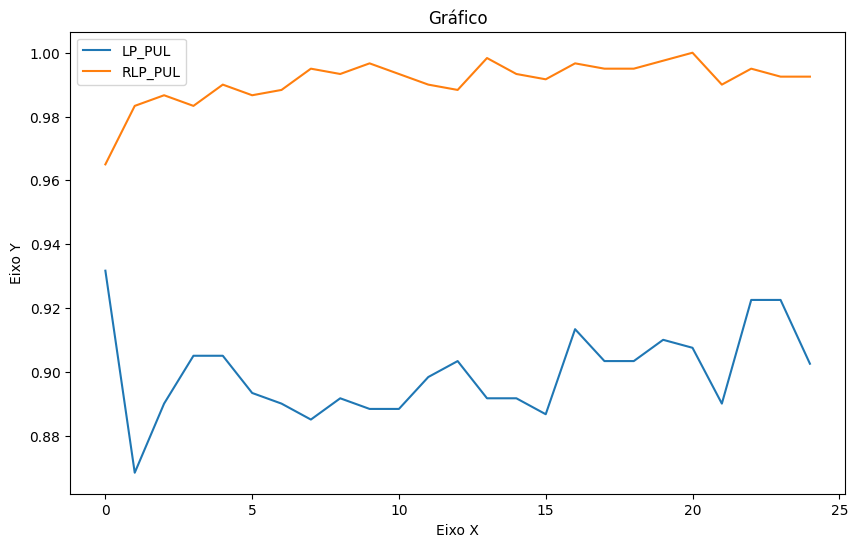

In [33]:
plt.figure(figsize=(10, 6))

# Iterar sobre as chaves e valores do dicionário e plotar cada linha
for chave, valores in df_plot.items():
    if chave == 'RLP_PUL' or chave == 'LP_PUL':
        plt.plot(valores, label=chave)

# Adicionar rótulos aos eixos
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Adicionar título ao gráfico
plt.title('Gráfico')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()